$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+2$$

The **global minimum** of this function is $f(0,0) = 0$. To avoid local mininma, we do the following:

In [1]:
# import the autoreload functionality
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from q3 import *

  15: x0 = ( 129.04, -37.34) -> converged at ( 128.74, -34.54) with f =   4.44403374
  22: x0 = ( 121.60,   0.48) -> converged at ( 119.32,  -0.00) with f =   3.56114609
  38: x0 = (  24.96,  18.52) -> converged at (  25.12,  18.84) with f =   0.24661680
  47: x0 = (   5.23,  12.40) -> converged at (   6.28,  12.56) with f =   0.04932336
 176: x0 = (  12.08,  -0.03) -> converged at (  12.56,  -0.00) with f =   0.03945869
 246: x0 = (  -4.52,   9.50) -> converged at (  -3.14,   9.42) with f =   0.02466168
 283: x0 = (   4.75,   1.13) -> converged at (   6.28,  -0.00) with f =   0.00986467
 298: x0 = (   2.31,   5.07) -> converged at (   3.14,   3.14) with f =   0.00493234
 422: x0 = (   0.96,   0.03) -> converged at (  -0.00,  -0.00) with f =   0.00000000
 423: x0 = (  -1.86,  -0.81) -> converged at (  -0.00,  -0.00) with f =   0.00000000
Best iteration counting warm up 423: x0 = (  -1.86,  -0.81) -> converged at (  -0.00,  -0.00) with f =   0.00000000
Best iteration not counting warm u

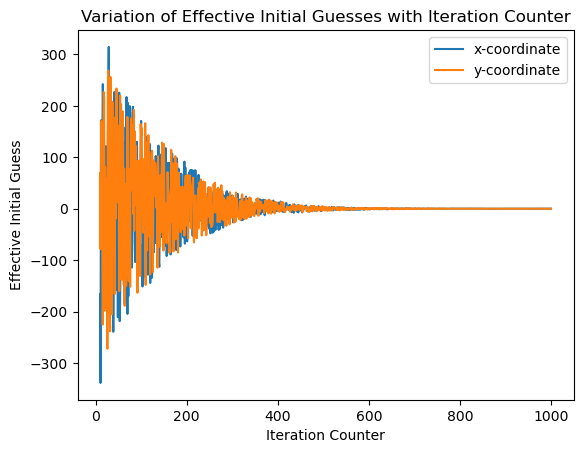

True


In [2]:
bounds = [-600, 600]  # Bounds for x1 and x2
tolerance = 1e-8  # Tolerance for convergence
warmup_iterations_list = [10, 100] 
warmup_iterations = 10  # Number of warm-up iterations
max_iterations = 1000  # Maximum number of iterations

result, initial_guesses = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)

x_values = [guess[0] for guess in initial_guesses]  # Extract the x-coordinate from each initial guess
y_values = [guess[1] for guess in initial_guesses]  # Extract the y-coordinate from each initial guess

plt.plot(range(warmup_iterations, max_iterations), x_values, label='x-coordinate')
plt.plot(range(warmup_iterations, max_iterations), y_values, label='y-coordinate')
plt.xlabel('Iteration Counter')
plt.ylabel('Effective Initial Guess')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

x, y = result
print(math.isclose(x, 0, abs_tol= 0.00005))


 142: x0 = (  18.43,   8.56) -> converged at (  15.70,  -3.14) with f =   0.06412037
 298: x0 = (   5.49,   8.81) -> converged at (   3.14,   9.42) with f =   0.02466168
 325: x0 = (  -3.76,  -5.13) -> converged at (  -3.14,  -3.14) with f =   0.00493234
 457: x0 = (  -3.20,  -0.24) -> converged at (  -3.14,  -3.14) with f =   0.00493234
 521: x0 = (  -0.82,   1.89) -> converged at (  -0.00,  -0.00) with f =   0.00000000
Best iteration counting warm up 521: x0 = (  -0.82,   1.89) -> converged at (  -0.00,  -0.00) with f =   0.00000000
Best iteration not counting warm up 421: x0 = (  -0.82,   1.89) -> converged at (  -0.00,  -0.00) with f =   0.00000000


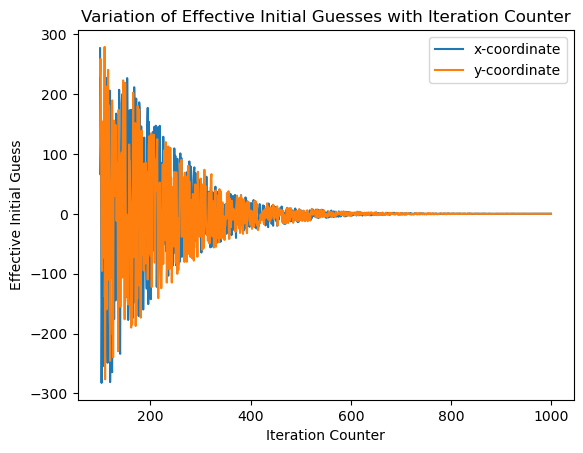

In [3]:
warmup_iterations_100 = 100

result_100, initial_guesses_100 = refined_global_optimizer(bounds, tolerance, warmup_iterations_100, max_iterations)

x_values_100 = [guess[0] for guess in initial_guesses_100]  # Extract the x-coordinate from each initial guess
y_values_100 = [guess[1] for guess in initial_guesses_100]  # Extract the y-coordinate from each initial guess

plt.plot(range(warmup_iterations_100, max_iterations), x_values_100, label='x-coordinate')
plt.plot(range(warmup_iterations_100, max_iterations), y_values_100, label='y-coordinate')
plt.xlabel('Iteration Counter')
plt.ylabel('Effective Initial Guess')
plt.title('Variation of Effective Initial Guesses with Iteration Counter')
plt.legend()
plt.show()